# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [2]:
from commonfunctions import *
import math

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


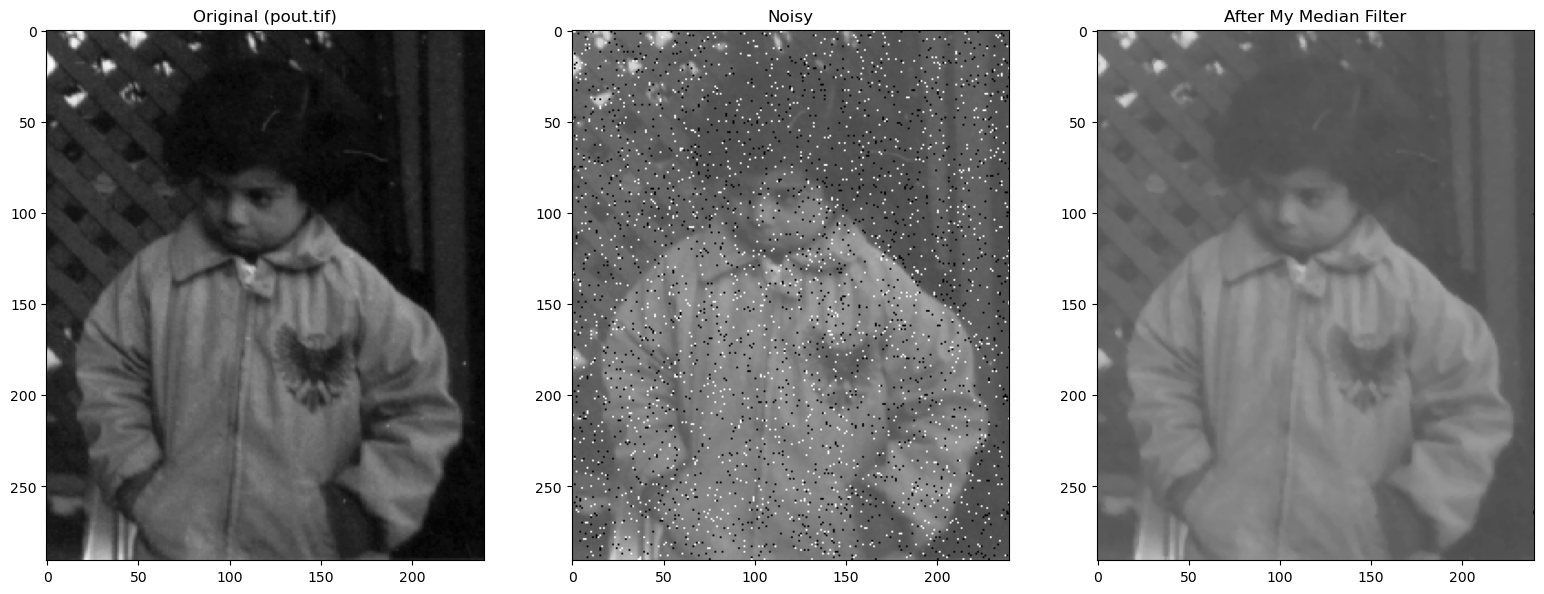

In [ ]:
'''
(1) Your own median filter algorithm

'''
import numpy as np
import skimage

def my_median_filter(img, kernel_size=3):
    if img.ndim == 3:
      
        img_f = rgb2gray(img)
    else:
     
        img_f = img.copy()

    # Padding size
    pad = kernel_size // 2

    # Pad image borders to handle edges
    padded = np.pad(img_f, pad_width=pad, mode='reflect')

    # Output image (same size as input)
    filtered = np.zeros_like(img_f)

    # Loop over every pixel
    for i in range(img_f.shape[0]):
        for j in range(img_f.shape[1]):
            # Extract k×k window
            window = padded[i:i+kernel_size, j:j+kernel_size]

            # Flatten & sort (ascending order)
            sorted_values = np.sort(window, axis=None)

            # Pick middle value
            median_value = sorted_values[len(sorted_values) // 2]

            # Replace pixel
            filtered[i, j] = median_value

    return filtered

img = io.imread('pout.tif')            


# Add salt & pepper noise
noisy_img = random_noise(img, mode='s&p', amount=0.05)

# Apply your median filter
filtered_img = my_median_filter(noisy_img, kernel_size=3)

# Show results
show_images(
    [img, noisy_img, filtered_img],
    ['Original (pout.tif)', 'Noisy', 'After My Median Filter']
)

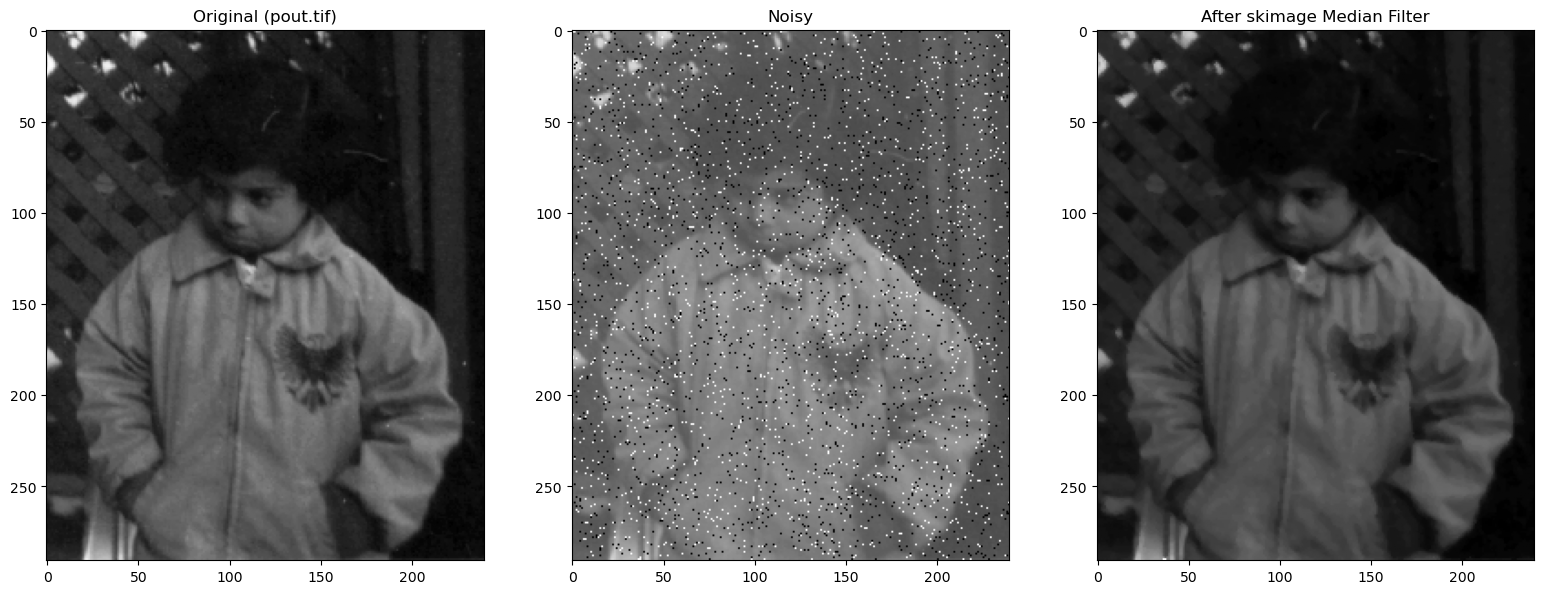

In [9]:
from skimage.filters import median

'''
(2) skimage median filter
'''
# Apply skimage's median filter with a 3x3 footprint
filtered_skimage = median(noisy_img, footprint=np.ones((3, 3)), mode='nearest')

# Show results
show_images(
    [img, noisy_img, filtered_skimage],
    ['Original (pout.tif)', 'Noisy', 'After skimage Median Filter']
)

'''
(3) Gaussion Filters
'''

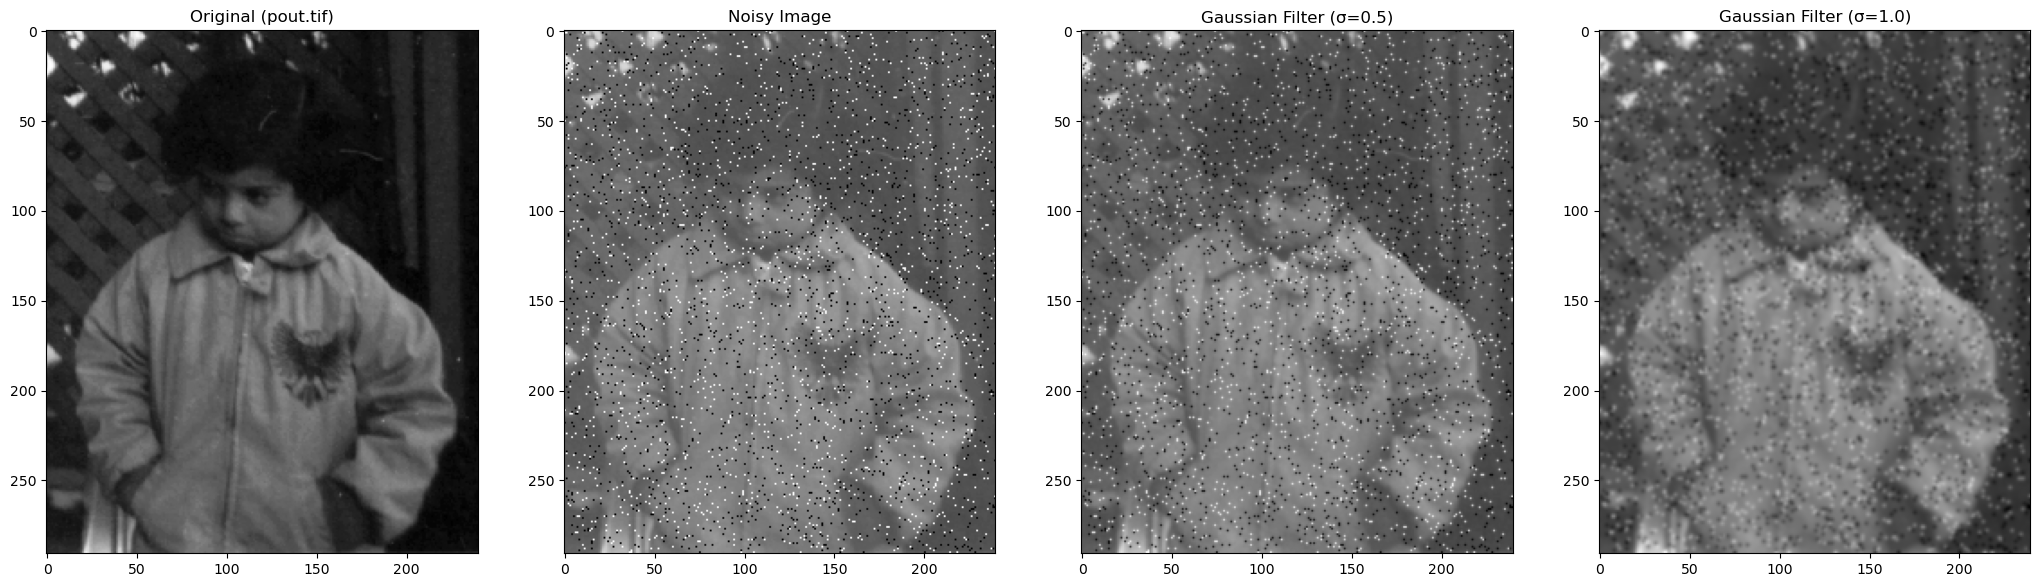

In [ ]:
from skimage.filters import gaussian
filtered_gaussian_1 = gaussian(noisy_img, sigma=0.5, mode='nearest', preserve_range=True)

# (2) Apply Gaussian filter with higher sigma (stronger blur)
filtered_gaussian_2 = gaussian(noisy_img, sigma=1.0, mode='nearest', preserve_range=True)

# Show all images
show_images(
    [img, noisy_img, filtered_gaussian_1, filtered_gaussian_2],
    [
        'Original (pout.tif)',
        'Noisy Image',
        'Gaussian Filter (σ=0.5)',
        'Gaussian Filter (σ=1.0)'
    ]
)

